### Text Analysis

In [1]:
# import library

import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

In [2]:
new_df = pd.read_csv('kompas_20211201_clean.csv')
judul_clean = new_df['cleaned title']
print(judul_clean)

0      genoa vs ac mil shevchenko ingin buat mantan k...
1               odha di depok masih dapat stigma negatif
2      pemprov jakarta bentuk tim khusus awas alat ma...
3                   tonton lokal piala aff acuh atur ini
4      pada akhir pekan tumpang di bandara soekarnoha...
                             ...                        
195    perintah bakal kembali terbit skb menteri jela...
196    densus sita senapan m dan peluru dari duga ter...
197    foto viral pasutri naik motor hingga menara ei...
198    momen indro satu lagi warkop dki telah kasino ...
199    pil covid molnupiravir msd akhir kantong izin fda
Name: cleaned title, Length: 200, dtype: object


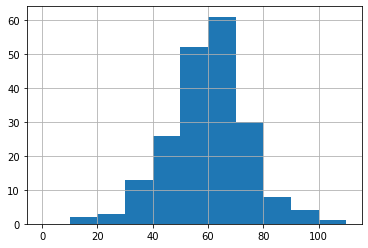

In [3]:
bin_range = np.arange(0, 120, 10)
judul_clean.str.len().hist(bins=bin_range)
plt.show()

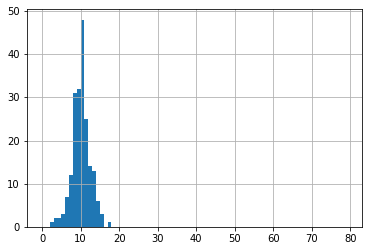

In [4]:
bin_range = np.arange(0, 80)
judul_clean.str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

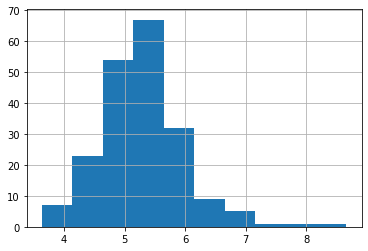

In [5]:
judul_clean.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [6]:
# Pertama kita lakukan tokenization pada dataset kita

judul_clean = judul_clean.apply(lambda x: word_tokenize(str(x)))

In [7]:
# # import library

# import pandas as pd
# import re, string
# from nltk.tokenize import word_tokenize
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # Menghilangkan stopwords

# def remove_stopwords(text:str):
#     stopwords_engine = StopWordRemoverFactory()
#     stopwords = stopwords_engine.get_stop_words()
#     more_stopwords = ['di', 'dan','yang', 'ini', 'untuk', 'ke'] # menambahkan stopwords
    
#     result = []
#     for word in text:
#         if word not in stopwords + more_stopwords:
#         # if word not in stopwords:
#             result.append(word)
#     return result 

In [8]:
# new_judul_clean = remove_stopwords(judul_clean)

# # for i in judul_clean:
# #     i = remove_stopwords(judul_clean)
# #     new_judul_clean.append(i)

In [9]:
judul_clean

0      [genoa, vs, ac, mil, shevchenko, ingin, buat, ...
1       [odha, di, depok, masih, dapat, stigma, negatif]
2      [pemprov, jakarta, bentuk, tim, khusus, awas, ...
3           [tonton, lokal, piala, aff, acuh, atur, ini]
4      [pada, akhir, pekan, tumpang, di, bandara, soe...
                             ...                        
195    [perintah, bakal, kembali, terbit, skb, menter...
196    [densus, sita, senapan, m, dan, peluru, dari, ...
197    [foto, viral, pasutri, naik, motor, hingga, me...
198    [momen, indro, satu, lagi, warkop, dki, telah,...
199    [pil, covid, molnupiravir, msd, akhir, kantong...
Name: cleaned title, Length: 200, dtype: object

In [10]:
# masukkan pada semua token tersebut pada satu list yang sama

list_judul = [judul for judul in judul_clean for judul in judul]

In [11]:
fqdist = FreqDist(list_judul)
print(fqdist)

<FreqDist with 1091 samples and 1932 outcomes>


In [12]:
# Untuk mengetahui kata dan jumlah dari masing-masing kata kita bisa menggunakan.

most_common_word = fqdist.most_common(20)
print(most_common_word)

[('di', 60), ('dan', 34), ('ini', 17), ('yang', 12), ('untuk', 12), ('tahun', 11), ('jakarta', 10), ('covid', 10), ('siap', 10), ('lagu', 10), ('baru', 10), ('ke', 10), ('indonesia', 9), ('polisi', 9), ('warga', 9), ('dari', 9), ('lirik', 9), ('tak', 8), ('jadi', 8), ('dengan', 8)]


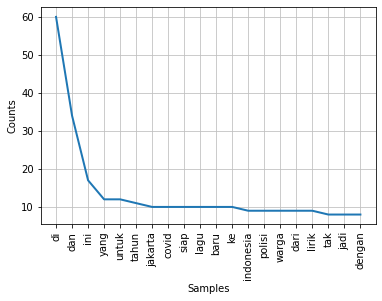

In [13]:
# Visualisasi

fqdist.plot(20,cumulative=False)
plt.show()

In [14]:
result = pd.Series(nltk.ngrams(list_judul, 10)).value_counts()[:20]

In [15]:
print (result)

(genoa, vs, ac, mil, shevchenko, ingin, buat, mantan, klub, sulit)                   1
(cilegon, pemkot, siap, jalur, evakuasi, warga, waspada, siklon, tropis, teratai)    1
(firli, bahuri, harap, tak, ada, lagi, korupsi, kait, izin, investasi)               1
(transportasi, firli, bahuri, harap, tak, ada, lagi, korupsi, kait, izin)            1
(sektor, transportasi, firli, bahuri, harap, tak, ada, lagi, korupsi, kait)          1
(di, sektor, transportasi, firli, bahuri, harap, tak, ada, lagi, korupsi)            1
(batas, di, sektor, transportasi, firli, bahuri, harap, tak, ada, lagi)              1
(skenario, batas, di, sektor, transportasi, firli, bahuri, harap, tak, ada)          1
(ikut, skenario, batas, di, sektor, transportasi, firli, bahuri, harap, tak)         1
(libur, ikut, skenario, batas, di, sektor, transportasi, firli, bahuri, harap)       1
(siap, libur, ikut, skenario, batas, di, sektor, transportasi, firli, bahuri)        1
(soot, siap, libur, ikut, skenario, batas, 